# Perspectives on Research
## Homework 01

### Initial Setup
#### Imports

In [78]:
#General
import numpy as np
import pandas as pd
import random

#Machine Learning
from sklearn.model_selection import train_test_split

#Deep Learning
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras import regularizers
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras import regularizers


#Tensor Flow
import tensorflow as tf
                    
#Visualization
import matplotlib.pyplot as plt
    
    

In [62]:
#Set Seed
SEED= 1234
import random
random.seed(SEED)

In [65]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# preprocess data to 2D tensors
# convert to float and make the values between 0 and 1
X_train = X_train.reshape([60000, 28*28]).astype('float32') / 255
X_test = X_test.reshape([10000, 28*28]).astype('float32') / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

#Splitting Training Data into Validation and Training
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=10000, random_state=SEED)

In [66]:
print(X_valid.shape)

(10000, 784)


In [67]:
epochs = np.arange(1, 201)

In [69]:
#Initial Model
baseline_model = Sequential()
#Setting up 5 models
baseline_model.add(Dense(512, activation='relu', input_shape=(28*28,)))
baseline_model.add(Dense(512, activation='relu'))
baseline_model.add(Dense(512, activation='relu'))
baseline_model.add(Dense(512, activation='relu'))
baseline_model.add(Dense(10, activation='softmax'))
baseline_model.compile(optimizer='rmsprop', 
                       loss='categorical_crossentropy', metrics=['accuracy'])

In [70]:
baseline_history = baseline_model.fit(X_train,
                              y_train,
                              epochs=200,
                              batch_size=512,
                              validation_data=(X_valid, y_valid))

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 11s 212us/step - loss: 0.8692 - acc: 0.6823 - val_loss: 0.5185 - val_acc: 0.8104
Epoch 2/200
50000/50000 [==============================] - 9s 180us/step - loss: 0.5148 - acc: 0.8078 - val_loss: 0.5295 - val_acc: 0.8093
Epoch 3/200
50000/50000 [==============================] - 8s 165us/step - loss: 0.4360 - acc: 0.8377 - val_loss: 0.4083 - val_acc: 0.8464
Epoch 4/200
50000/50000 [==============================] - 11s 216us/step - loss: 0.3891 - acc: 0.8558 - val_loss: 0.4050 - val_acc: 0.8514
Epoch 5/200
50000/50000 [==============================] - 9s 186us/step - loss: 0.3517 - acc: 0.8690 - val_loss: 0.3546 - val_acc: 0.8652
Epoch 6/200
50000/50000 [==============================] - 9s 177us/step - loss: 0.3320 - acc: 0.8745 - val_loss: 0.3437 - val_acc: 0.8719
Epoch 7/200
50000/50000 [==============================] - 9s 185us/step - loss: 0.3082 - acc: 0.8837 - val_loss: 

50000/50000 [==============================] - 7s 144us/step - loss: 0.1195 - acc: 0.9592 - val_loss: 0.4613 - val_acc: 0.8964
Epoch 60/200
50000/50000 [==============================] - 7s 138us/step - loss: 0.1064 - acc: 0.9621 - val_loss: 0.6457 - val_acc: 0.8815
Epoch 61/200
50000/50000 [==============================] - 7s 132us/step - loss: 0.1079 - acc: 0.9610 - val_loss: 0.6528 - val_acc: 0.8875
Epoch 62/200
50000/50000 [==============================] - 8s 150us/step - loss: 0.1116 - acc: 0.9606 - val_loss: 0.5118 - val_acc: 0.8951
Epoch 63/200
50000/50000 [==============================] - 7s 137us/step - loss: 0.1096 - acc: 0.9618 - val_loss: 0.5112 - val_acc: 0.9002
Epoch 64/200
50000/50000 [==============================] - 7s 134us/step - loss: 0.1055 - acc: 0.9620 - val_loss: 0.5933 - val_acc: 0.8956
Epoch 65/200
50000/50000 [==============================] - 7s 133us/step - loss: 0.1128 - acc: 0.9610 - val_loss: 0.6537 - val_acc: 0.8892
Epoch 66/200
50000/50000 [=======

50000/50000 [==============================] - 6s 127us/step - loss: 0.0688 - acc: 0.9782 - val_loss: 0.8243 - val_acc: 0.8862
Epoch 118/200
50000/50000 [==============================] - 8s 159us/step - loss: 0.0798 - acc: 0.9765 - val_loss: 0.6372 - val_acc: 0.8968
Epoch 119/200
50000/50000 [==============================] - 7s 146us/step - loss: 0.0771 - acc: 0.9774 - val_loss: 0.7640 - val_acc: 0.8997
Epoch 120/200
50000/50000 [==============================] - 7s 141us/step - loss: 0.0767 - acc: 0.9771 - val_loss: 0.6512 - val_acc: 0.9003
Epoch 121/200
50000/50000 [==============================] - 7s 150us/step - loss: 0.0738 - acc: 0.9773 - val_loss: 0.7346 - val_acc: 0.9009
Epoch 122/200
50000/50000 [==============================] - 9s 175us/step - loss: 0.0700 - acc: 0.9788 - val_loss: 0.7367 - val_acc: 0.8956
Epoch 123/200
50000/50000 [==============================] - 8s 152us/step - loss: 0.0764 - acc: 0.9776 - val_loss: 0.7315 - val_acc: 0.8998
Epoch 124/200
50000/50000 [

50000/50000 [==============================] - 7s 134us/step - loss: 0.0592 - acc: 0.9846 - val_loss: 0.8717 - val_acc: 0.8923
Epoch 176/200
50000/50000 [==============================] - 7s 136us/step - loss: 0.0664 - acc: 0.9829 - val_loss: 0.7573 - val_acc: 0.8911
Epoch 177/200
50000/50000 [==============================] - 8s 157us/step - loss: 0.0775 - acc: 0.9820 - val_loss: 0.7622 - val_acc: 0.8893
Epoch 178/200
50000/50000 [==============================] - 8s 168us/step - loss: 0.0690 - acc: 0.9830 - val_loss: 0.8428 - val_acc: 0.8939
Epoch 179/200
50000/50000 [==============================] - 8s 167us/step - loss: 0.0649 - acc: 0.9843 - val_loss: 0.8295 - val_acc: 0.8859
Epoch 180/200
50000/50000 [==============================] - 7s 149us/step - loss: 0.0624 - acc: 0.9853 - val_loss: 0.8332 - val_acc: 0.9012
Epoch 181/200
50000/50000 [==============================] - 7s 143us/step - loss: 0.0682 - acc: 0.9849 - val_loss: 0.8049 - val_acc: 0.9011
Epoch 182/200
50000/50000 [

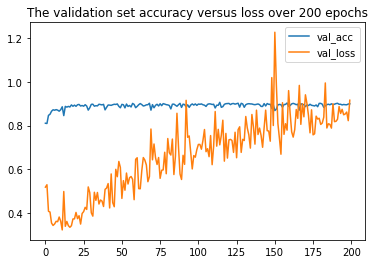

In [76]:
val_acc = baseline_history.history['val_acc']
val_loss = baseline_history.history['val_loss']
plt.plot(val_acc)
plt.plot(val_loss)
plt.legend(['val_acc', 'val_loss'])
plt.title('The validation set accuracy versus loss over 200 epochs')
plt.show()


In [73]:
#Model with Drop
dropout_model = Sequential()
dropout_model.add(Dense(512, activation='relu', input_shape=(28 * 28,)))
dropout_model.add(Dropout(0.5))
dropout_model.add(Dense(512, activation='relu'))
dropout_model.add(Dropout(0.5))
dropout_model.add(Dense(512, activation='relu'))
dropout_model.add(Dropout(0.5))
dropout_model.add(Dense(512, activation='relu'))
dropout_model.add(Dropout(0.5))
dropout_model.add(Dense(10, activation='softmax'))

dropout_model.compile(optimizer='rmsprop',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])
result_dropout = dropout_model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=200, batch_size=512)

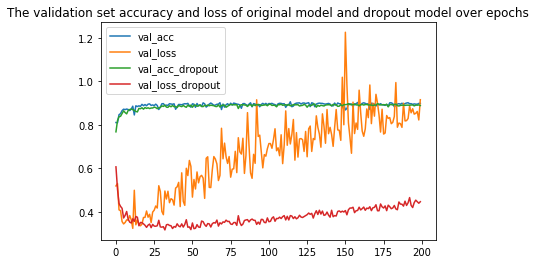

In [77]:
val_acc_dropout = result_dropout.history['val_acc']
val_loss_dropout = result_dropout.history['val_loss']
plt.plot(val_acc)
plt.plot(val_loss)
plt.plot(val_acc_dropout)
plt.plot(val_loss_dropout)
plt.legend(['val_acc', 'val_loss', 'val_acc_dropout', 'val_loss_dropout'])
plt.title('Comparison of Baseline and Dropout Model for Loss & Accuracy')
plt.show()

We see here that the accuracy on the validation set is almost identical for both the model with and without the dropout option. However, the dropout model fares far better on loss, which rises much less over epochs than for the baseline model. 

### Regularization Models

In [83]:
#L1 Regularization
model_L1 = Sequential()
model_L1.add(Dense(512, activation='relu', input_shape=(28 * 28,), kernel_regularizer=regularizers.l1(0.001)))
model_L1.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
model_L1.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
model_L1.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
model_L1.add(Dense(10, activation='softmax'))
model_L1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_L1 = model_L1.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=200, batch_size=512)




Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 9s 176us/step - loss: 14.6816 - acc: 0.5417 - val_loss: 4.1789 - val_acc: 0.6272
Epoch 2/200
50000/50000 [==============================] - 10s 205us/step - loss: 3.0972 - acc: 0.6509 - val_loss: 2.4645 - val_acc: 0.6545
Epoch 3/200
50000/50000 [==============================] - 10s 191us/step - loss: 2.2172 - acc: 0.7005 - val_loss: 2.0203 - val_acc: 0.7165
Epoch 4/200
50000/50000 [==============================] - 9s 180us/step - loss: 1.9076 - acc: 0.7309 - val_loss: 1.8268 - val_acc: 0.7154
Epoch 5/200
50000/50000 [==============================] - 10s 191us/step - loss: 1.7521 - acc: 0.7500 - val_loss: 1.7095 - val_acc: 0.7593
Epoch 6/200
50000/50000 [==============================] - 10s 199us/step - loss: 1.6682 - acc: 0.7626 - val_loss: 1.5987 - val_acc: 0.7757
Epoch 7/200
50000/50000 [==============================] - 9s 186us/step - loss: 1.6041 - acc: 0.7724 - val_los

50000/50000 [==============================] - 7s 146us/step - loss: 1.2148 - acc: 0.8380 - val_loss: 1.2355 - val_acc: 0.8336
Epoch 60/200
50000/50000 [==============================] - 7s 149us/step - loss: 1.2148 - acc: 0.8389 - val_loss: 1.2257 - val_acc: 0.8357
Epoch 61/200
50000/50000 [==============================] - 7s 146us/step - loss: 1.2127 - acc: 0.8415 - val_loss: 1.2720 - val_acc: 0.8118
Epoch 62/200
50000/50000 [==============================] - 7s 149us/step - loss: 1.2100 - acc: 0.8412 - val_loss: 1.2637 - val_acc: 0.8183
Epoch 63/200
50000/50000 [==============================] - 8s 152us/step - loss: 1.2096 - acc: 0.8402 - val_loss: 1.2587 - val_acc: 0.8222
Epoch 64/200
50000/50000 [==============================] - 8s 158us/step - loss: 1.2080 - acc: 0.8399 - val_loss: 1.2151 - val_acc: 0.8437
Epoch 65/200
50000/50000 [==============================] - 8s 160us/step - loss: 1.2070 - acc: 0.8409 - val_loss: 1.2674 - val_acc: 0.8191
Epoch 66/200
50000/50000 [=======

50000/50000 [==============================] - 7s 146us/step - loss: 1.1632 - acc: 0.8495 - val_loss: 1.2827 - val_acc: 0.8103
Epoch 118/200
50000/50000 [==============================] - 8s 155us/step - loss: 1.1684 - acc: 0.8452 - val_loss: 1.1990 - val_acc: 0.8334
Epoch 119/200
50000/50000 [==============================] - 7s 145us/step - loss: 1.1635 - acc: 0.8484 - val_loss: 1.2021 - val_acc: 0.8351
Epoch 120/200
50000/50000 [==============================] - 7s 145us/step - loss: 1.1660 - acc: 0.8481 - val_loss: 1.1837 - val_acc: 0.8388
Epoch 121/200
50000/50000 [==============================] - 7s 138us/step - loss: 1.1656 - acc: 0.8486 - val_loss: 1.1838 - val_acc: 0.8383
Epoch 122/200
50000/50000 [==============================] - 7s 138us/step - loss: 1.1639 - acc: 0.8481 - val_loss: 1.1778 - val_acc: 0.8440
Epoch 123/200
50000/50000 [==============================] - 7s 140us/step - loss: 1.1626 - acc: 0.8467 - val_loss: 1.2199 - val_acc: 0.8282
Epoch 124/200
50000/50000 [

50000/50000 [==============================] - 8s 157us/step - loss: 1.1450 - acc: 0.8496 - val_loss: 1.1756 - val_acc: 0.8395
Epoch 176/200
50000/50000 [==============================] - 8s 157us/step - loss: 1.1439 - acc: 0.8504 - val_loss: 1.1761 - val_acc: 0.8389
Epoch 177/200
50000/50000 [==============================] - 8s 163us/step - loss: 1.1466 - acc: 0.8500 - val_loss: 1.2452 - val_acc: 0.8079
Epoch 178/200
50000/50000 [==============================] - 8s 165us/step - loss: 1.1489 - acc: 0.8484 - val_loss: 1.1784 - val_acc: 0.8356
Epoch 179/200
50000/50000 [==============================] - 8s 161us/step - loss: 1.1443 - acc: 0.8516 - val_loss: 1.1825 - val_acc: 0.8378
Epoch 180/200
50000/50000 [==============================] - 8s 158us/step - loss: 1.1450 - acc: 0.8502 - val_loss: 1.1605 - val_acc: 0.8452
Epoch 181/200
50000/50000 [==============================] - 8s 163us/step - loss: 1.1449 - acc: 0.8515 - val_loss: 1.1701 - val_acc: 0.8422
Epoch 182/200
50000/50000 [

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 12s 243us/step - loss: 0.9753 - acc: 0.6346 - val_loss: 0.6064 - val_acc: 0.7676
Epoch 2/200
50000/50000 [==============================] - 10s 192us/step - loss: 0.5936 - acc: 0.7858 - val_loss: 0.5043 - val_acc: 0.8190
Epoch 3/200
50000/50000 [==============================] - 9s 185us/step - loss: 0.5176 - acc: 0.8135 - val_loss: 0.4379 - val_acc: 0.8374
Epoch 4/200
50000/50000 [==============================] - 9s 178us/step - loss: 0.4762 - acc: 0.8285 - val_loss: 0.4244 - val_acc: 0.8391
Epoch 5/200
50000/50000 [==============================] - 9s 175us/step - loss: 0.4508 - acc: 0.8403 - val_loss: 0.4156 - val_acc: 0.8521
Epoch 6/200
50000/50000 [==============================] - 9s 173us/step - loss: 0.4315 - acc: 0.8466 - val_loss: 0.3712 - val_acc: 0.8643
Epoch 7/200
50000/50000 [==============================] - 9s 173us/step - loss: 0.4144 - acc: 0.8528 - val_loss: 

50000/50000 [==============================] - 9s 189us/step - loss: 0.2852 - acc: 0.9039 - val_loss: 0.3403 - val_acc: 0.8893
Epoch 60/200
50000/50000 [==============================] - 9s 190us/step - loss: 0.2945 - acc: 0.9012 - val_loss: 0.3324 - val_acc: 0.8877
Epoch 61/200
50000/50000 [==============================] - 9s 170us/step - loss: 0.2884 - acc: 0.9011 - val_loss: 0.3454 - val_acc: 0.8909
Epoch 62/200
50000/50000 [==============================] - 10s 194us/step - loss: 0.2933 - acc: 0.9025 - val_loss: 0.3438 - val_acc: 0.8877
Epoch 63/200
50000/50000 [==============================] - 11s 212us/step - loss: 0.2916 - acc: 0.9035 - val_loss: 0.3295 - val_acc: 0.8901
Epoch 64/200
50000/50000 [==============================] - 10s 193us/step - loss: 0.2875 - acc: 0.9054 - val_loss: 0.3449 - val_acc: 0.8893
Epoch 65/200
50000/50000 [==============================] - 10s 196us/step - loss: 0.2916 - acc: 0.9024 - val_loss: 0.3496 - val_acc: 0.8880
Epoch 66/200
50000/50000 [===

50000/50000 [==============================] - 9s 171us/step - loss: 0.3051 - acc: 0.9102 - val_loss: 0.3684 - val_acc: 0.8934
Epoch 118/200
50000/50000 [==============================] - 9s 173us/step - loss: 0.3071 - acc: 0.9096 - val_loss: 0.3767 - val_acc: 0.8917
Epoch 119/200
50000/50000 [==============================] - 8s 167us/step - loss: 0.3111 - acc: 0.9069 - val_loss: 0.3672 - val_acc: 0.8921
Epoch 120/200
50000/50000 [==============================] - 9s 172us/step - loss: 0.2918 - acc: 0.9108 - val_loss: 0.3721 - val_acc: 0.8925
Epoch 121/200
50000/50000 [==============================] - 9s 174us/step - loss: 0.3067 - acc: 0.9096 - val_loss: 0.3836 - val_acc: 0.8865
Epoch 122/200
50000/50000 [==============================] - 10s 209us/step - loss: 0.3153 - acc: 0.9095 - val_loss: 0.3754 - val_acc: 0.8884
Epoch 123/200
50000/50000 [==============================] - 9s 184us/step - loss: 0.3105 - acc: 0.9085 - val_loss: 0.3733 - val_acc: 0.8893
Epoch 124/200
50000/50000 

50000/50000 [==============================] - 9s 178us/step - loss: 0.3566 - acc: 0.9093 - val_loss: 0.4225 - val_acc: 0.8919
Epoch 176/200
50000/50000 [==============================] - 10s 194us/step - loss: 0.3302 - acc: 0.9108 - val_loss: 0.4169 - val_acc: 0.8928
Epoch 177/200
50000/50000 [==============================] - 9s 174us/step - loss: 0.3435 - acc: 0.9110 - val_loss: 0.4266 - val_acc: 0.8915
Epoch 178/200
50000/50000 [==============================] - 8s 168us/step - loss: 0.3473 - acc: 0.9110 - val_loss: 0.4048 - val_acc: 0.8944
Epoch 179/200
50000/50000 [==============================] - 10s 191us/step - loss: 0.3521 - acc: 0.9132 - val_loss: 0.4300 - val_acc: 0.8825
Epoch 180/200
50000/50000 [==============================] - 9s 185us/step - loss: 0.3472 - acc: 0.9131 - val_loss: 0.4230 - val_acc: 0.8926
Epoch 181/200
50000/50000 [==============================] - 9s 175us/step - loss: 0.3433 - acc: 0.9100 - val_loss: 0.4138 - val_acc: 0.8932
Epoch 182/200
50000/50000

In [86]:
model_L2 = Sequential()
model_L2.add(Dense(512, activation='relu', input_shape=(28 * 28,), kernel_regularizer=regularizers.l2(0.001)))
model_L2.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model_L2.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model_L2.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model_L2.add(Dense(10, activation='softmax'))
model_L2.compile(optimizer='rmsprop', 
                 loss='categorical_crossentropy', 
                 metrics=['accuracy'])
result_L2 = model_L2.fit(X_train, y_train, 
                         validation_data=(X_valid, y_valid), 
                         epochs=200, batch_size=512)



Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 7s 146us/step - loss: 2.1672 - acc: 0.6712 - val_loss: 1.4058 - val_acc: 0.7653
Epoch 2/200
50000/50000 [==============================] - 7s 140us/step - loss: 1.1873 - acc: 0.7877 - val_loss: 1.1427 - val_acc: 0.7661
Epoch 3/200
50000/50000 [==============================] - 7s 144us/step - loss: 0.8929 - acc: 0.8143 - val_loss: 1.0313 - val_acc: 0.7682
Epoch 4/200
50000/50000 [==============================] - 7s 147us/step - loss: 0.7471 - acc: 0.8283 - val_loss: 0.8378 - val_acc: 0.8068
Epoch 5/200
50000/50000 [==============================] - 7s 145us/step - loss: 0.6756 - acc: 0.8330 - val_loss: 0.6692 - val_acc: 0.8295
Epoch 6/200
50000/50000 [==============================] - 7s 146us/step - loss: 0.6222 - acc: 0.8411 - val_loss: 0.6090 - val_acc: 0.8403
Epoch 7/200
50000/50000 [==============================] - 8s 158us/step - loss: 0.5835 - acc: 0.8473 - val_loss: 0.

50000/50000 [==============================] - 7s 139us/step - loss: 0.3594 - acc: 0.9022 - val_loss: 0.5077 - val_acc: 0.8511
Epoch 60/200
50000/50000 [==============================] - 7s 134us/step - loss: 0.3601 - acc: 0.9018 - val_loss: 0.4123 - val_acc: 0.8841
Epoch 61/200
50000/50000 [==============================] - 7s 134us/step - loss: 0.3587 - acc: 0.9036 - val_loss: 0.5160 - val_acc: 0.8483
Epoch 62/200
50000/50000 [==============================] - 7s 135us/step - loss: 0.3593 - acc: 0.9023 - val_loss: 0.4317 - val_acc: 0.8749
Epoch 63/200
50000/50000 [==============================] - 7s 135us/step - loss: 0.3541 - acc: 0.9050 - val_loss: 0.5058 - val_acc: 0.8560
Epoch 64/200
50000/50000 [==============================] - 7s 133us/step - loss: 0.3559 - acc: 0.9027 - val_loss: 0.4652 - val_acc: 0.8650
Epoch 65/200
50000/50000 [==============================] - 7s 134us/step - loss: 0.3548 - acc: 0.9031 - val_loss: 0.4103 - val_acc: 0.8851
Epoch 66/200
50000/50000 [=======

50000/50000 [==============================] - 7s 133us/step - loss: 0.3280 - acc: 0.9131 - val_loss: 0.4221 - val_acc: 0.8811
Epoch 118/200
50000/50000 [==============================] - 7s 134us/step - loss: 0.3303 - acc: 0.9128 - val_loss: 0.4457 - val_acc: 0.8814
Epoch 119/200
50000/50000 [==============================] - 7s 133us/step - loss: 0.3313 - acc: 0.9118 - val_loss: 0.4652 - val_acc: 0.8730
Epoch 120/200
50000/50000 [==============================] - 7s 134us/step - loss: 0.3270 - acc: 0.9156 - val_loss: 0.4072 - val_acc: 0.8896
Epoch 121/200
50000/50000 [==============================] - 7s 134us/step - loss: 0.3276 - acc: 0.9141 - val_loss: 0.5834 - val_acc: 0.8260
Epoch 122/200
50000/50000 [==============================] - 7s 137us/step - loss: 0.3292 - acc: 0.9138 - val_loss: 0.4083 - val_acc: 0.8888
Epoch 123/200
50000/50000 [==============================] - 7s 134us/step - loss: 0.3228 - acc: 0.9154 - val_loss: 0.4851 - val_acc: 0.8562
Epoch 124/200
50000/50000 [

50000/50000 [==============================] - 8s 154us/step - loss: 0.3168 - acc: 0.9188 - val_loss: 0.4294 - val_acc: 0.8874
Epoch 176/200
50000/50000 [==============================] - 7s 144us/step - loss: 0.3139 - acc: 0.9199 - val_loss: 0.5010 - val_acc: 0.8610
Epoch 177/200
50000/50000 [==============================] - 7s 137us/step - loss: 0.3163 - acc: 0.9187 - val_loss: 0.4718 - val_acc: 0.8701
Epoch 178/200
50000/50000 [==============================] - 8s 158us/step - loss: 0.3154 - acc: 0.9202 - val_loss: 0.4971 - val_acc: 0.8647
Epoch 179/200
50000/50000 [==============================] - 8s 158us/step - loss: 0.3140 - acc: 0.9196 - val_loss: 0.4243 - val_acc: 0.8832
Epoch 180/200
50000/50000 [==============================] - 7s 146us/step - loss: 0.3142 - acc: 0.9198 - val_loss: 0.5312 - val_acc: 0.8634
Epoch 181/200
50000/50000 [==============================] - 7s 138us/step - loss: 0.3155 - acc: 0.9184 - val_loss: 0.5144 - val_acc: 0.8568
Epoch 182/200
50000/50000 [

In [87]:
val_loss = result.history['val_loss']
val_loss_dropout = result_dropout.history['val_loss']
val_loss_L1 = result_L1.history['val_loss']
val_loss_L2 = result_L2.history['val_loss']
plt.plot(val_loss)
plt.plot(val_loss_dropout)
plt.plot(val_loss_L1)
plt.plot(val_loss_L2)
plt.legend(['val_loss', 'val_loss_dropout', 'val_loss_L1', 'val_loss_L2'])
plt.title('The validation loss for the initial/dropout/L1/L2 model over epochs')
plt.show()

NameError: name 'result' is not defined

### Alternative Models
We will use 12 alternative models